In [13]:
%pylab inline
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns
import scipy

import pandas as pd
import numpy as np


Populating the interactive namespace from numpy and matplotlib


In [20]:
baseImdb = pd.read_csv('theBaseIds.csv', encoding='ISO-8859-1')
bechdelDataset = pd.read_csv('mergeWithRevenue.csv', encoding='ISO-8859-1')                                          

In [15]:
len(bechdelDataset)

7446

In [16]:
bechdelDataset.isnull().sum()


Unnamed: 0                      0
id                              0
imdb_id                         2
Rating                          0
Title                           0
Year                            0
Unnamed: 0_y                 4578
color                        4705
director_name                  10
num_critic_for_reviews          0
duration                       33
director_facebook_likes         0
actor_3_facebook_likes          0
actor_2_name                 4704
actor_1_facebook_likes          0
gross                        4898
genres                         12
actor_1_name                 4703
num_voted_users                 0
cast_total_facebook_likes    4703
actor_3_name                 4707
facenumber_in_poster            0
plot_keywords                4711
movie_imdb_link              4703
num_user_for_reviews            0
language                        9
country                         9
content_rating               4735
budget                       4844
actor_2_facebo

In [21]:
baseImdbDataset = bechdelDataset[bechdelDataset.imdb_id.isin(baseImdb.imdb_ids)]


In [18]:
cpiData = pd.read_csv('cpi.csv')
cpiData.head()

FileNotFoundError: File b'cpi.csv' does not exist

In [19]:
#Lets fill in columns based on rating
for i in range(len(bechdelDataset)):
    rating = bechdelDataset.iloc[i]['Rating']
    if (rating == 0):
        bechdelDataset.set_value(i, 'binary', 'FAIL')
        bechdelDataset.set_value(i, 'test', 'nowomen')
        bechdelDataset.set_value(i, 'clean_test', 'nowomen')
    if (rating == 1):
        bechdelDataset.set_value(i, 'binary', 'FAIL')
        bechdelDataset.set_value(i, 'test', 'notalk')
        bechdelDataset.set_value(i, 'clean_test', 'notalk')
    if (rating == 2):
        bechdelDataset.set_value(i, 'binary', 'FAIL')
        bechdelDataset.set_value(i, 'test', 'men')
        bechdelDataset.set_value(i, 'clean_test', 'men')
    if (rating == 3):
        bechdelDataset.set_value(i, 'binary', 'PASS')
        bechdelDataset.set_value(i, 'test', 'ok')
        bechdelDataset.set_value(i, 'clean_test', 'ok')
            

            

ValueError: invalid literal for int() with base 10: 'FAIL'

In [ ]:
#And adjust box office revenue data by the cpi data too
from decimal import Decimal
from re import sub

baseCPI = cpiData[cpiData['Year'] == 2013]['Avg']

In [ ]:
for i in range(len(bechdelDataset)):
    internationalGross = bechdelDataset.iloc[i]['intgross_2013$']
    domGross = bechdelDataset.iloc[i]['domgross_2013$']
    if (pd.notnull(internationalGross) and pd.notnull(domGross)):
        bechdelDataset.set_value(i,'adjusted_box_office', internationalGross + domGross)
    else:
        if (pd.notnull(bechdelDataset.iloc[i]['box_office'])):
            boxOfficeVal = Decimal(sub(r'[^\d.]', '', bechdelDataset.iloc[i]['box_office']))
            yearMovie = bechdelDataset.iloc[i]['Year']
            yearVal = cpiData[cpiData.Year == yearMovie]['Avg'][yearMovie - 1913]
            bechdelDataset.set_value(i, 'adjusted_box_office', (yearVal/(1.0 * baseCPI)) * float(boxOfficeVal))

In [ ]:
bechdelDataset.columns.values
bechdelDataset.to_csv('mergeWithRevenue.csv', encoding='utf-8')

In [ ]:
#Let us start with trend analysis

In [ ]:
bechdelDataset.groupby(['binary', 'clean_test']).size()
mergedSet = bechdelDataset.groupby(['Year', 'binary']).size()
mergedSet = mergedSet.unstack('binary')
mergedSet = mergedSet.fillna(0.0)
plt.figure()
ax = ((mergedSet.PASS)/(mergedSet.PASS+mergedSet.FAIL)).plot(xlim=[1890, 2020], title='% pass by year')
                                                             
ax.legend(labels=['PASS'], loc='best')
ax.set_ylabel("Proportion of film in pass for a given year")

In [ ]:
#mergedSet = mergedSet.stack('Year')
mergedSet = mergedSet.groupby((mergedSet.index//10)*10).sum()
mergedSet

In [36]:
baseMerged = baseImdbDataset.groupby(['Year', 'binary']).size()
baseMerged = baseMerged.unstack('binary')
baseMerged = baseMerged.fillna(0.0)
baseMerged = baseMerged.groupby((baseMerged.index//10)*10).sum()
baseMerged = baseMerged.rename(index=str, columns={0: "FAIL", 1: "PASS"})
print(baseMerged.columns.values)

['FAIL' 'PASS']


In [23]:
plt.figure()
ax = ((mergedSet.PASS)/(mergedSet.PASS+mergedSet.FAIL)).plot.bar(x=mergedSet.index, title='% pass by decade')                       
    
ax.set_ylabel("Proportion of film in pass for a given decade")
ax.set_xlabel("Decade")

NameError: name 'mergedSet' is not defined

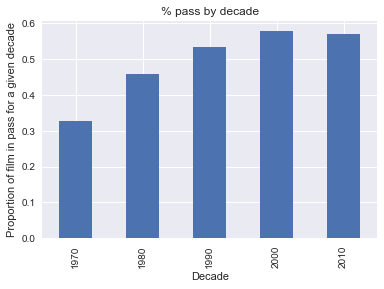

In [37]:
plt.figure()
ax = ((baseMerged.PASS)/(baseMerged.PASS+baseMerged.FAIL)).plot.bar(x=baseMerged.index, title='% pass by decade')                       
    
ax.set_ylabel("Proportion of film in pass for a given decade")
ax.set_xlabel("Decade")

The original base dataset shows a much lower pass rate for the years, but the same overall trend from the 1970s is still prominent. The 2010s seem to have a lower pass rate however.

In [ ]:
bechdelDataset.genres

In [ ]:
bechdelYears = bechdelDataset.groupby(['Year']).size()
ax = bechdelYears.plot(xlim=[1890, 2020], title='Number of years')
                                                             
ax.legend(labels=['PASS'], loc='best')
ax.set_ylabel("Number of films for a given decade")

In [ ]:
from collections import defaultdict

genreDict = defaultdict(list)
for i in range(7446):
    print(i)
    if (type(bechdelDataset.iloc[i]['genres']) is str):
      genres = bechdelDataset.iloc[i]['genres'].split('||')
      for genre in genres:
        genreDict[genre].append(bechdelDataset.iloc[i]['binary'])

        

In [ ]:
genreX = []
genreY = []
for genre in genreDict:
    genreX.append(genre)
    passNum = 0.0
    genreLen = len(genreDict[genre])
    for word in genreDict[genre]:
        if (word == 'PASS'):
            passNum += 1.0
    genreY.append(passNum/(1.0 * genreLen))
    

In [ ]:
genreDataset = {'genre': genreX, 'pass rate': genreY}
ax = sns.barplot(x="pass rate", y="genre", data=genreDataset, orient="h")
ax.set_ylabel("Pass Rate for Genre")
ax.set_xlabel("Genre")
ax.set_title("Bechdel pass by genre")

In [ ]:
theSet = bechdelDataset.groupby(['country']).size()
theSet.sort_values(ascending=False)

In [ ]:
theSet = bechdelDataset.groupby(['country']).size()
theSet = theSet.sort_values(ascending=False)[0:15].keys()
topFifteen = bechdelDataset[bechdelDataset.country.isin(theSet)]
theSet = topFifteen.groupby(['country', 'binary']).size()
theSet = theSet.unstack('binary')
theSet['PASS proportion'] = theSet.PASS/(theSet.PASS+theSet.FAIL)
ax = sns.barplot(x=theSet['PASS proportion'], y=theSet.index.values, data=theSet, orient="h")
ax.set_title('Percentage of films passing test by country')
ax.set(ylabel='Mean pass proportion in country')

In [ ]:
theSet = bechdelDataset.groupby(['country']).size()
print(theSet[0:15].keys())

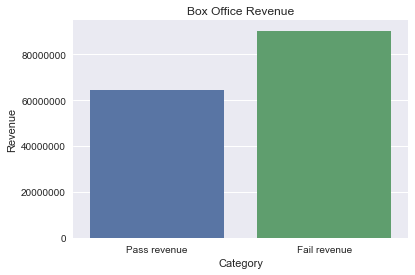

In [44]:
passDataset = bechdelDataset[bechdelDataset.binary == 1]
failDataset = bechdelDataset[bechdelDataset.binary == 0]

medianPassValue = 0.0
medianPassLen = 0.0
medianFailValue = 0.0
medianFailLen = 0.0
medianPasses = []
medianFails = []

for revenue in passDataset.adjusted_box_office.values:
    if (int(revenue) != 0):
       medianPasses.append(revenue)

medianPassValue = pd.Series(medianPasses).median()
    
for revenue in failDataset.adjusted_box_office.values:
    if (int(revenue) != 0):
        medianFails.append(revenue)  
        
medianFailValue = pd.Series(medianFails).median()        
    
ax = sns.barplot(x=["Pass revenue", "Fail revenue"], y=[medianPassValue, medianFailValue], orient="v") 
ax.ticklabel_format(style='plain', axis='y')
ax.set_ylabel("Revenue")
ax.set_xlabel("Category")
ax.set_title("Box Office Revenue")

In [ ]:
genreDict = defaultdict(list)
for i in range(7446):
    print(i)
    if (type(bechdelDataset.iloc[i]['genres']) is str):
      genres = bechdelDataset.iloc[i]['genres'].split('||')
      if (len(genres) > 1):
         bechdelDataset.loc[i,'Multigenre'] = 'Y'
      else:
         bechdelDataset.loc[i,'Multigenre'] = 'N'
      for genre in genres:
        genreDict[genre].append((bechdelDataset.iloc[i]['binary'], bechdelDataset.iloc[i]['adjusted_box_office']))

genreX = []
genreY = []

failGenreX = []
failGenreY = []

for genre in genreDict:
    genreX.append(genre)
    failGenreX.append(str(genre))
    passBoxOffices = []
    genreLen = 0.0
    failBoxOffices = []
    failGenreLen = 0.0
    
    for word, box_office in genreDict[genre]:
        if (box_office != 0.0 and word == 'FAIL'):
            failBoxOffices.append(box_office)
            failGenreLen += 1.0
            
        if (box_office != 0.0 and word == 'PASS'):
            passBoxOffices.append(box_office)
            genreLen += 1.0
                          
    genreY.append(pd.Series(passBoxOffices).median())
    failGenreY.append(pd.Series(failBoxOffices).median())


In [ ]:
bechdelDataset["Multigenre"].head(15)

In [ ]:
print(genreX)
print(failGenreX)

In [ ]:
print(genreY)
print(failGenreY)

In [ ]:
genreDataset = {'genre': genreX, 'Revenue': genreY}
ax = sns.barplot(x="Revenue", y="genre", data=genreDataset, orient='h')
ax.set_ylabel("Office Revenue")
ax.set_xlabel("Genre")
ax.set_title("Box Office Revenue for passed films by genre")

In [ ]:
genreDataset = {'genre': failGenreX, 'Revenue': failGenreY}
ax = sns.barplot(x="Revenue", y="genre", data=genreDataset, orient='h')
ax.set_ylabel("Office Revenue")
ax.set_xlabel("Genre")
ax.set_title("Box Office Revenue for failed films by genre")

In [ ]:
genres = []
scenarios = []
revenues = []
for i in range(len(genreX)):
   genres.append(genreX[i])
   genres.append(failGenreX[i])
   scenarios.append("pass")
   scenarios.append("fail")
   if (pd.isnull(genreY[i])):
      genreY[i] = 0.0
   revenues.append(genreY[i]) 
   if (pd.isnull(failGenreY[i])):
      failGenreY[i] = 0.0  
   revenues.append(failGenreY[i])
      

theData = pd.DataFrame({"genre": genres, "scenario": scenarios, "revenue": revenues})
print(theData)   
    
ax = sns.barplot(x="revenue", y="genre", hue='scenario', data=theData, orient='h')
ax.set_ylabel("Office Revenue")
ax.set_xlabel("Genre")
ax.set_title("Box Office plot by genre")

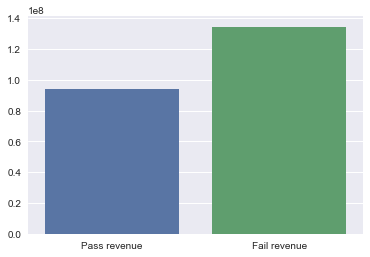

In [41]:
passDataset = bechdelDataset[bechdelDataset.binary == 1]
failDataset = bechdelDataset[bechdelDataset.binary == 0]
passDataset = passDataset[passDataset.country == 'USA']
failDataset = failDataset[failDataset.country == 'USA']

medianPassValue = 0.0
medianPassLen = 0.0
medianFailValue = 0.0
medianFailLen = 0.0
medianPasses = []
medianFails = []

for revenue in passDataset.adjusted_box_office.values:
    if (int(revenue) != 0):
       medianPasses.append(revenue)

medianPassValue = pd.Series(medianPasses).median()
    
for revenue in failDataset.adjusted_box_office.values:
    if (int(revenue) != 0):
        medianFails.append(revenue)  
        
medianFailValue = pd.Series(medianFails).median()   
    
ax = sns.barplot(x=["Pass revenue", "Fail revenue"], y=[medianPassValue, medianFailValue], orient="v")   

In [ ]:
print(np.std(passDataset.adjusted_box_office.values))
print(np.std(failDataset.adjusted_box_office.values))

In [ ]:
print(medianPassValue)
print(medianFailValue)

In [ ]:
#Let us use a welch t-test that does not assume equal population variance.
from scipy import stats

passVals = [value for value in passDataset.adjusted_box_office.values if int(value) != 0]
failVals = [value for value in failDataset.adjusted_box_office.values if int(value) != 0]
tstat, pval = stats.ttest_ind(passVals, failVals, equal_var = False)
print(pval)
print(medianPassValue)
print((medianPassValue - medianFailValue)/medianPassValue)

In [ ]:
#Hence there is a significant difference and we reject the null hypothesis of no difference.